<a href="https://colab.research.google.com/github/komorimasashi/bunka-hakaru/blob/main/Py_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##相関係数

###相関係数の定義

相関係数(correlation coefficient)}は
$\begin{equation}
r = \frac{ S_{\mathrm{xy}} }{ S_{\mathrm{x}} S_{\mathrm{y}} }
\end{equation}
$で定義されます．


ここで、$x$の分散(variance) $S_{\mathrm{x}}^{2}$と$y$の分散$S_{\mathrm{y}}^{2}$は
\begin{eqnarray}
S_{\mathrm{x}}^{2} &=& \frac{1}{n} \sum_{i=1}^{n} \left( x_{i} - \overline{x} \right)^{2} = \frac{1}{n} \sum_{i=1}^{n} x_{i}^{2} - \overline{x} ^{2} , \\
S_{\mathrm{y}}^{2} &=& \frac{1}{n} \sum_{i=1}^{n} \left( y_{i} - \overline{y} \right)^{2} = \frac{1}{n} \sum_{i=1}^{n} y_{i}^{2} - \overline{y} ^{2} 
\end{eqnarray}

と表され、$x$の平均(average) $\overline{x}$と$y$の平均 $\overline{y}$は
\begin{eqnarray}
\overline{x} &=& \frac{1}{n} \sum_{i=1}^{n} x_{i} \\
\overline{y} &=& \frac{1}{n} \sum_{i=1}^{n} y_{i}
\end{eqnarray}
です．

また，共分散(covariance) $S_{\mathrm{xy}}$は
\begin{equation}
S_{\mathrm{xy}} = \frac{1}{n} \sum_{i=1}^{n} \left( x_{i} - \overline{x} \right) \left( y_{i} - \overline{y} \right) = \frac{1}{n} \sum_{i=1}^{n} x_{i} y_{i} - \overline{x} \overline{y}
\end{equation}
です．


$\begin{equation}
r = \frac{ S_{\mathrm{xy}} }{ S_{\mathrm{x}} S_{\mathrm{y}} }
\end{equation}
$の分母は$x$の$S_{\mathrm{x}}^{2}$と$y$の分散$S_{\mathrm{y}}^{2}$それぞれの平方根であることに注意してください．

|$r$の範囲&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|相関の度合い|
|---|---|
|$-1 ≤ r < -0.7$|強い負の相関|
|$-0.7 ≤ r < -0.4$|負の相関|
|$-0.4 ≤ r < -0.2$|弱い負の相関|
|$-0.2 ≤ r < 0.2$|相関がほとんどない|
|$0.2 ≤ r < 0.4$|弱い正の相関|
|$0.4 ≤ r < 0.7$|正の相関|
|$0.7 ≤ r ≤ 1$|強い正の相関|

###相関係数の計算の仕方

今一度，分散共分散行列
$
\boldsymbol{\Sigma}  = 
\begin{pmatrix}
1 & 0.8 \\ 
0.8 & 1
\end{pmatrix}
$
とした時の正規乱数の生成します
これは相関係数$r=0.8$の状態です

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


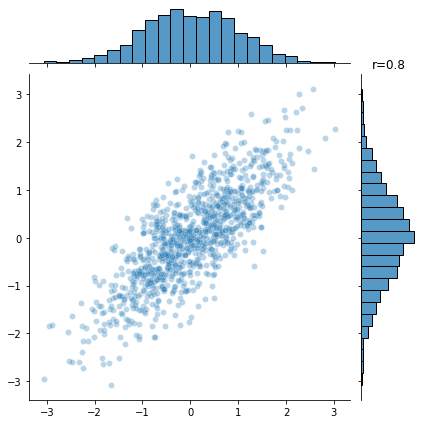

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

mu = [0, 0]
sigma = [[1, 0.8], [0.8, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=0.8")
plt.show()

In [ ]:
#numpyで相関係数を求める

np.corrcoef(values[:,0], values[:,1])
#ほぼ-0.8になっていることがわかる

array([[1.        , 0.79730636],
       [0.79730636, 1.        ]])

In [ ]:
# Pandasで相関係数を求める
import pandas as pd
#相関係数pandas
pd.DataFrame(values).corr()

,0,1
0,1.000000,0.797306
1,0.797306,1.000000


In [ ]:
# 3変数の相関

mu = [0, 0, 0]
sigma = [[1, 0.8, 0.2], [0.8, 1, 0.5], [0.2, 0.5, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)

#相関係数pandas
pd.DataFrame(values).corr()


,0,1,2
0,1.000000,0.795697,0.157946
1,0.795697,1.000000,0.464871
2,0.157946,0.464871,1.000000


###乱数で生成した変数同士の相関

正規分布$\mathcal{N} (\mu,\sigma^2)$に従う正規乱数を生成する関数として

```
numpy.random.normal(loc, scale, size)
```
が用意されています．これを使って多変量正規分布に従う乱数を発生させます


*   loc: 生成したい正規分布の平均を指定(default=0)

*   scale: 生成したい正規分布の標準偏差を指定(default=1)

*   size: 生成する乱数の数を指定(default=None)





平均が
$
\boldsymbol{\mu}  = 
\begin{pmatrix}
0 \\
0\end{pmatrix}
$ 
分散共分散行列
$
\boldsymbol{\Sigma}  = 
\begin{pmatrix}
1 & 1 \\ 
1 & 1
\end{pmatrix}
$
とした時の正規乱数の生成をするために下を実行します

これは相関係数$r=1$の状態です

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
 
mu = [0, 0]
sigma = [[1, 1], [1, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=1.0")
plt.show()

In [ ]:
mu = [0, 0]
sigma = [[1, 0.95], [0.95, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=0.95")
plt.show()

次に，分散共分散行列
$
\boldsymbol{\Sigma}  = 
\begin{pmatrix}
1 & 0.8 \\ 
0.8 & 1
\end{pmatrix}
$
とした時の正規乱数の生成します
これは相関係数$r=0.8$の状態です

In [ ]:
mu = [0, 0]
sigma = [[1, 0.8], [0.8, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=0.8")
plt.show()

In [ ]:
mu = [0, 0]
sigma = [[1, 0.5], [0.5, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=0.5")
plt.show()

In [ ]:
mu = [0, 0]
sigma = [[1, 0.3], [0.3, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=0.3")
plt.show()

次に，分散共分散行列
$
\boldsymbol{\Sigma}  = 
\begin{pmatrix}
1 & 0 \\ 
0 & 1
\end{pmatrix}
$
とした時の正規乱数の生成します

これは「無相関」（$r=0$つまり独立）の状態です


In [ ]:
mu = [0, 0]
sigma = [[1, 0], [0, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=0.0")
plt.show()

次に，分散共分散行列
$
\boldsymbol{\Sigma}  = 
\begin{pmatrix}
1 & -0.8 \\ 
-0.8 & 1
\end{pmatrix}
$
とした時の正規乱数の生成します


In [ ]:
mu = [0, 0]
sigma = [[1, -0.8], [-0.8, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=-0.8")
plt.show()


In [ ]:
mu = [0, 0]
sigma = [[1, -0.3], [-0.3, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=-0.3")
plt.show()
